

# Project: Investigate a Dataset -[ tmdb-movies]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 
This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.



### Question(s) for Analysis
Q1:what gener have most revenues?

Q2:what is the top 5 rated movies?

 

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
% matplotlib inline
# While optional for current notebooks, if you are having trouble with visualizations,
#   remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


UsageError: Line magic function `%` not found.


<a id='wrangling'></a>
## Data Wrangling

in this section i loaded the dataset , cheack for cleanliness, and then clean it and prepared for analysis


### General Properties
This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue

In [2]:
# Load your data and print out a few lines. What is the size of your dataframe? 
#   Perform operations to inspect data types and look for instances of missing
#   or possibly errant data. 

df = pd.read_csv('Database_TMDb_movie_data/tmdb-movies.csv')
df.head(1)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [4]:
df.shape

(10866, 21)

In [5]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09



### Data Cleaning
before starting my analsis i cheack the dataset and found missing values,  inapropiate datatype I cleaned the database.
1) I removed the columns " cast, homepage, tagline, keywords, overview and imdb_id" to enhance database redability.

2) 'Genres' and 'productions_companies' had multiple values in the same row of data, therefore in order to improve grouping and provide a cleaner representation for the analysis that follows, I chose to eliminate the values after the first '|' symbol.

3) I converted the string "release_date" to a date datatype.
 

In [6]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
df = df.drop(['cast','homepage','tagline','keywords','overview','imdb_id'], axis=1)

In [7]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9807 entries, 0 to 10865
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    9807 non-null   int64  
 1   popularity            9807 non-null   float64
 2   budget                9807 non-null   int64  
 3   revenue               9807 non-null   int64  
 4   original_title        9807 non-null   object 
 5   director              9807 non-null   object 
 6   runtime               9807 non-null   int64  
 7   genres                9807 non-null   object 
 8   production_companies  9807 non-null   object 
 9   release_date          9807 non-null   object 
 10  vote_count            9807 non-null   int64  
 11  vote_average          9807 non-null   float64
 12  release_year          9807 non-null   int64  
 13  budget_adj            9807 non-null   float64
 14  revenue_adj           9807 non-null   float64
dtypes: float64(4), int64

In [ ]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9807 entries, 0 to 10865
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    9807 non-null   int64  
 1   popularity            9807 non-null   float64
 2   budget                9807 non-null   int64  
 3   revenue               9807 non-null   int64  
 4   original_title        9807 non-null   object 
 5   director              9807 non-null   object 
 6   runtime               9807 non-null   int64  
 7   genres                9807 non-null   object 
 8   production_companies  9807 non-null   object 
 9   release_date          9807 non-null   object 
 10  vote_count            9807 non-null   int64  
 11  vote_average          9807 non-null   float64
 12  release_year          9807 non-null   int64  
 13  budget_adj            9807 non-null   float64
 14  revenue_adj           9807 non-null   float64
dtypes: float64(4), int64

In [10]:
df['release_date'] = pd.to_datetime(df['release_date'])

In [11]:
df['genres'] = df['genres'].apply(lambda x: x.split('|')[0])
df['production_companies'] = df['production_companies'].apply(lambda x: x.split('|')[0])

In [12]:
df.head(3)

,id,popularity,budget,revenue,original_title,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action,Universal Studios,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action,Village Roadshow Pictures,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,110000000,295238201,Insurgent,Robert Schwentke,119,Adventure,Summit Entertainment,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08


<a id='eda'></a>
## Exploratory Data Analysis

after cleansing the data set. I begin analyzing to find the answers to my questions:


###  Question 1 (what gener have most revenues?)

In [13]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
genresrevenue = df.groupby(['genres'])['revenue'].sum()
print(genresrevenue)


genres
Action             96487224972
Adventure          73040959448
Animation          28748603451
Comedy             67894064795
Crime              12706531293
Documentary          796201832
Drama              61581731996
Family              8854452778
Fantasy            18299055669
Foreign                      0
History             1951867180
Horror             15392612240
Music               2304615926
Mystery             3019881629
Romance             7044513404
Science Fiction    17046401611
TV Movie              42000000
Thriller           13003269735
War                 2708551908
Western             1305819749
Name: revenue, dtype: int64


Text(0.5, 1.0, 'genres revenues')

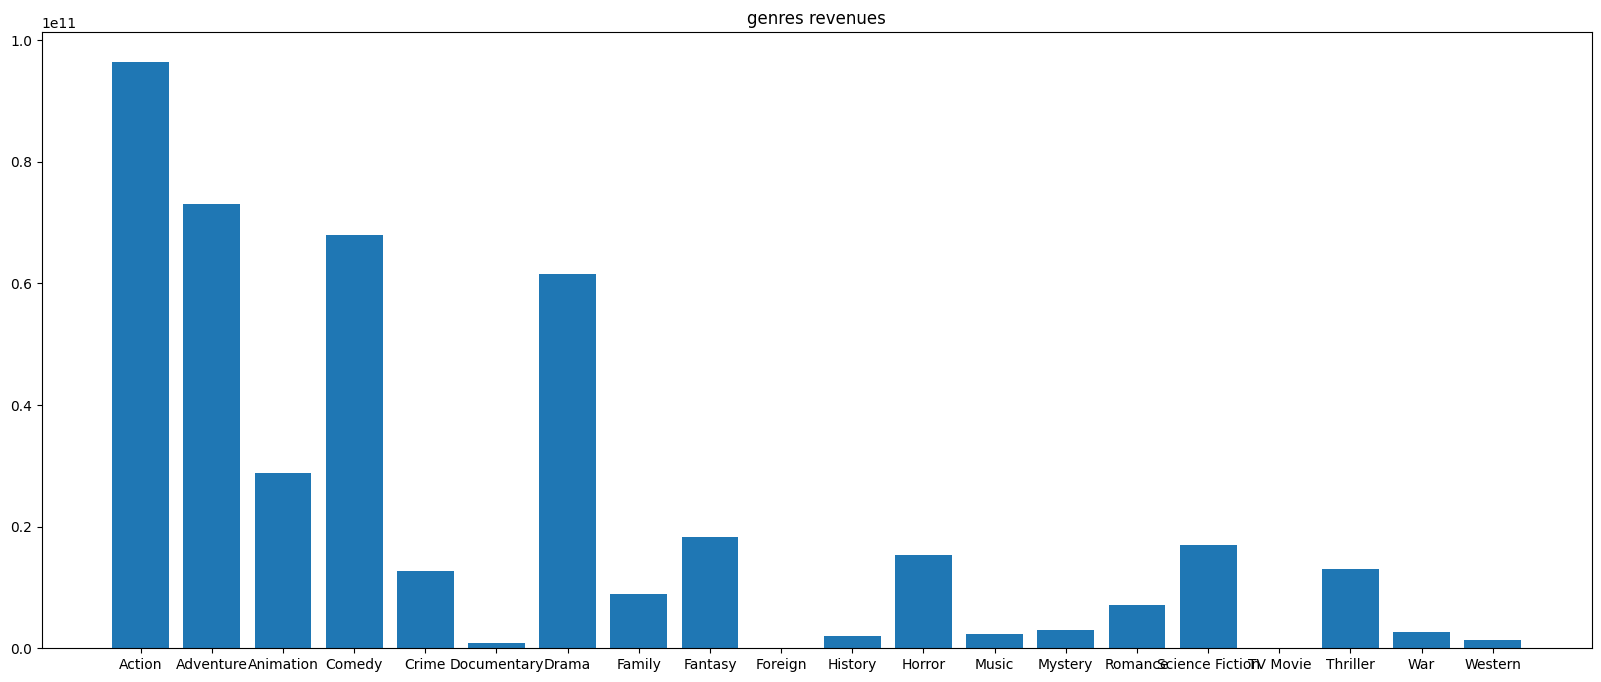

In [14]:
plt.subplots(figsize=(20,8))
plt.bar(genresrevenue.index, genresrevenue)
plt.title('genres revenues')

### Question 2  (what is the top 5 rated movies)

In [15]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.
five_top_rated_movies= df.sort_values(by=['vote_average'],ascending=False).head(5)
five_top_rated_movies.head()


,id,popularity,budget,revenue,original_title,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
6911,24970,0.212010,0,0,Pink Floyd: Pulse,David Mallet,145,Music,SMV Enterprises,2006-07-09,23,8.7,2006,0.0,0.0
8221,55676,0.194889,0,0,A Personal Journey with Martin Scorsese Throug...,Martin Scorsese|Michael Henry Wilson,225,Documentary,Miramax Films,1995-05-21,11,8.5,1995,0.0,0.0
3690,68450,0.321341,0,0,The Art of Flight,Curt Morgan,80,Adventure,Red Bull Media House,2011-09-08,60,8.5,2011,0.0,0.0
8411,25093,0.302908,0,0,Queen - Rock Montreal,Saul Swimmer,138,Music,Edel records GmbH,1981-11-24,14,8.5,1981,0.0,0.0
609,321640,0.033378,0,0,The Jinx: The Life and Deaths of Robert Durst,Andrew Jarecki,240,Documentary,Blumhouse Productions,2015-02-08,72,8.4,2015,0.0,0.0


([0, 1, 2, 3, 4],
 [Text(0, 0, 'Pink Floyd: Pulse'),
  Text(1, 0, 'A Personal Journey with Martin Scorsese Through American Movies'),
  Text(2, 0, 'The Art of Flight'),
  Text(3, 0, 'Queen - Rock Montreal'),
  Text(4, 0, 'The Jinx: The Life and Deaths of Robert Durst')])

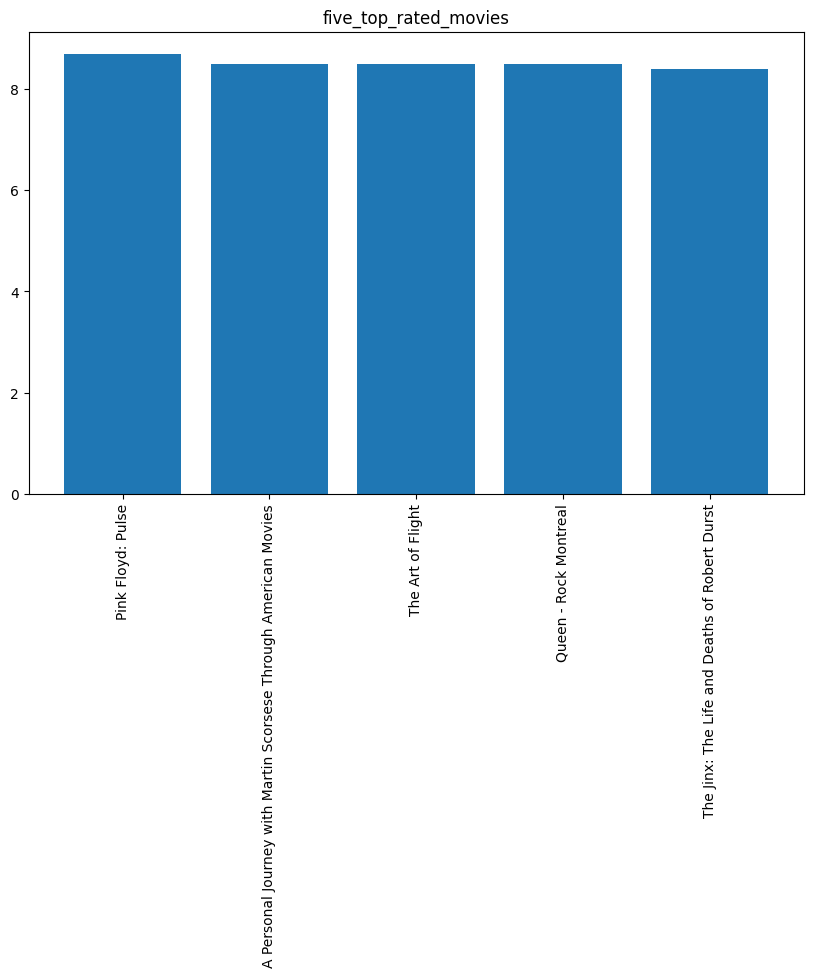

In [16]:
plt.subplots(figsize=(10,6))
plt.bar(five_top_rated_movies['original_title'],five_top_rated_movies['vote_average'] )
plt.title('five_top_rated_movies')
plt.xticks(rotation="vertical")


<a id='conclusions'></a>
## Conclusions

In my first question I found that action movies get the most revenues, then adventure movies.


In my second question i found the "Pink Floyd: Pulse" is the top rated movie with avrege vote 8.7 , “A Personal Journey with Martin Throug american movies, The Art of Flight, Queen - Rock Montreal" comes in a second place with avrege vote 8.5, and then comes The "Jinx: The Life and Deaths of Robert Durst" with avrege vote 8.4  



In [17]:
# Running this cell will execute a bash command to convert this notebook to an .html file
!python -m nbconvert --to html Investigate_a_Dataset.ipynb

[NbConvertApp] Converting notebook Investigate_a_Dataset.ipynb to html
[NbConvertApp] Writing 844672 bytes to Investigate_a_Dataset.html
